# 1. Giới thiệu

Các bạn hẳn thấy hình vẽ dưới đây quen thuộc:

![](image1.png)

Điểm màu xanh lục là điểm **local minimum** (cực tiểu), và cũng là điểm làm cho hàm số đạt giá trị nhỏ nhất. Từ đây trở đi, tôi sẽ dùng local minimum để thay cho điểm cực tiểu, **global minimum** để thay cho điểm mà tại đó hàm số đạt giá trị nhỏ nhất. Global minimum là trường hợp đặc biẹt của local minimum.

Giả sử chúng ta đang quan tâm đến một hàm số một biến có đạo hàm mọi nơi. Xin cho tôi được nhắc lại vài điều đã quá quen thuộc:

1. Điểm local minimum $x^{x}$ của hàm số là điểm có đạo hàm $f^{'}(x^{*})=0$. Hơn thế nữa, trong lân cận của nó, đoạ hàm của các điểm phía bên trái $x^{*}$ là không dương, đạo hàm của các điểm phía bên phải $x^{*}$ là không âm.
2. Đường tiếp tuyến với đồ thị hàm số đó lại 1 điểm bất kỳ có hệ số góc chín bằng đạo hàm của hàm số tại điểm đó.

Trong hình phía trên, các điểm bên trái của điểm local minimum màu xanh lục có đạo hàm âm, các điểm bên phải có đạo hàm dương. Và đối với hàm số này, càng xa về phía trái của điểm local minimum thì đạo hàm càng âm, càng xa về phía phải thì đạo hàm càng dương.

## Gradient Descent

Trong Machine Learning nói riêng và Toán Tối Ưu nói chung, chúng ta thường xuyên phải tìm giá trị nhỏ nhất (hoặc đôi khi là lớn nhất) của một hàm số nào đó. Ví dụ như các hàm mất mát trong hai bài Linear Regression và K-means Clustering. Nhìn chung, việc tìm global minimum của các hàm mất mát trong Machine Learning là rất phức tạp, thậm chí là bất khả thi. Thay vào đó, người ta thường cố gắng tìm các điểm local minimum, và ở một mức độ nào đó, coi đó là nghiệm cần tìm của bài toán.

Các điểm local minimum là nghiệm của phương trình đạo hàm bằng 0. Nếu bằng một cách nào đó có thể tìm được toàn bộ (hữu hạn) các điểm cực tiểu, ta chỉ cần thay từng điểm local minimum đó vào hàm số rồi tìm điểm làm cho hàm có giá trị nhỏ nhất (đoạn này nghe rất quen thuộc, đúng không?). Tuy nhiên, trong hầu hết các trường hợp, việc giải phương trình đạo hàm bằng 0 là bất khả thi. Nguyên nhân có thể đến từ sự phức tạp của dạng của đạo hàm, từ việc các điểm dữ liệu có số chiều lớn, hoặc từ việc có quá nhiều điểm dữ liệu.

Hướng tiếp cận phổ biến nhất là xuất phát từ một điểm mà chúng ta coi là gần với nghiệm của bài toán, sau đó dùng một phép toán lặp để tiến dần đến điểm cần tìm, tức đến khi đạo hàm gần với 0. Gradient Descent (viết gọn là GD) và các biến thể của nó là một trong những phương pháp được dùng nhiều nhất.

Vì kiến thức về GD khá rộng nên tôi xin phép được chia thành hai phần. Phần 1 này giới thiệu ý tưởng phía sau thuật toán GD và một vài ví dụ đơn giản giúp các bạn làm quen với thuật toán này và vài khái niệm mới. Phần 2 sẽ nói về các phương pháp cải tiến GD và các biến thể của GD trong các bài toán mà số chiều và số điểm dữ liệu lớn. Những bài toán như vậy được gọi là large-scale.

# 2. Gradient Descent cho hàm 1 biến

![](image1.png)

Quay trở lại hình vẽ ban đầu và một vai fquan sát của tôi dã nếu. Giả sử $x_{t}$ là điểm ta tìm được sau vòng lặp thứ $t$. Ta cần tìm một thuật toán để đưua $x_{t}$ về càng gần $x^{*}$ càng tốt.



Trong hình này, chúng ta lại có thêm 2 quan sát nữa:
- Nếu đạo hàm của hàm số tại $x_{t}: f^{'}(x_{t}) > 0$ thì $x_{t}$ nằm về bên phải so với $x_{t}$ (và ngược lại). Để điểm tiếp theo $x_{t+1}$ gần với $x^{*}$ hơn, chúng ta cần di chuyển $x_{t}$ về phía trái, tức là phía âm. Nói cách khác **chúng ta cần di chuyển ngược dấu với đạo hàm**:
$$
x_{x+1}=x_{t}+\triangle
$$
Trong đó $\triangle$ là một đại lượng ngược dấu với đạo hàm $f^{'}(x_t)$
- $x_{t}$ càng xa $x^{*}$ về phía bên phải thì $f^{'}(x_{t})$ càng lớn hơn 0 (và ngược lại). Vậy lượng di chuyển $\triangle$, một cách trực quan nhất, lỉ lệ thuật với $-f^{'}(x_{t})$.

Hai nhận xét phía trên cho chúng ta một cách cập nhật đơn giản là:
$$
x_{t+1}=x_{t}-\eta.f^{'}(x_{t})
$$
- trong đó:
    - $\eta$: learning rate (số dương)
    - $-$: đi ngược với đạo hàm

## Ví dụ đơn giản với Python

Xét hàm số $f(x)=x^{2}+5.sin(x)$ với đạo hàm $f^{'}(x)=2x+5.cos(x)$. (lý do sử dụng hàm này cho ví dụ là vì nó không dễ tìm nghiệm của đạo hàm bằng 0 như hàm phía trên). Giả xử bắt đầu từ một điểm $x_{0}$ nào đó, tại vòng lặp thứ $t$, chúng ta sẽ cập nhật như sau:
$$
x_{t+1}=x_{t}-\eta.(2x_{t}+5cos(x_{t}))
$$

In [2]:
from __future__ import division, print_function, unicode_literals
import math
import numpy as np
import matplotlib.pyplot as plt

để tính đạo hàm:

In [3]:
def grad(x):
    return 2*x + 5*np.cos(x)

để tính giá trị của hàm số. Hàm này không sử dụng trong thuật toán nhưng thường được dùng để kiểm tra việc tính đạo hàm của đúng không hoặc để xem giá trị của hàm số có giảm theo mỗi vòng lặp hay không:

In [4]:
def cost(x):
    return x**2 + 5*np.sin(x)

phần chính thực hiện thuật toán Gradient Desent nêu phía trên. Đầu vào của hàm số này là learning rate và điểm bắt đầu. Thuật toán dừng lại khi đạo hàm có độ lớn đủ nhỏ:

In [5]:
def myGD(
        eta,
        x0
):
    x = [x0]

    for it in range(100):
        x_new = x[-1] - eta*grad(x[-1])

        if abs(grad(x_new)) < 1e-3:
            break

        x.append(x_new)

    return (x, it)

### Điểm khởi tạo khác nhau:

Sau khi có các hàm cần thiết, tôi thử tìm nghiệm với các điểm khởi tạo khác nhau là
$x_{0}=-5$ và $x_{0}=5$.

In [7]:
(x1, it1) = myGD(.1, -5)

In [8]:
print('Solution x1 = %f, cost = %f, obtained after %d iterations'%(x1[-1], cost(x1[-1]), it1))

Solution x1 = -1.110667, cost = -3.246394, obtained after 11 iterations


In [9]:
(x2, it2) = myGD(.1, 5)

In [10]:
print('Solution x2 = %f, cost = %f, obtained after %d iterations'%(x2[-1], cost(x2[-1]), it2))

Solution x2 = -1.110341, cost = -3.246394, obtained after 29 iterations


Vậy là với các điểm ban đầu khác nhau, thuật toán của chúng ta tìm được nghiệm gần giống nhau, mặc dù với tốc độ hội tụ khác nhau. Dưới đây là hình ảnh minh họa thuật toán GD cho bài toán này

![](image2.png)

Từ hình minh họa trên ta thấy rằng ở hình bên trái, tương ứng với $x_{0}=-5$, nghiệm hội tụ nhanh hơn, vì điểm ban đầu $x_{0}$ gần với nghiệm $x^{*} \approx -1$ hơn. Hơn nữa, với $x_{0}=5$ ở hình bên phải, đường đi của nghiệm có chứa một khu vực có đạo hàm khá nhỏ gần điểm có hoành độ bằng 2. Điều này khiến cho thuật toán la cà ở đây khá lâu. Khi vượt qua được điểm này thì mọi việc diễn ra rất tốt đẹp.

### Learning Rate khác nhau

Tốc độ hội tụ của GD không những phụ thuộc vào điểm khởi tạo ban đầu mà còn phụ thuộc vào learning rate. Dưới đây là một ví dụ với cùng điểm khởi tạo $x_{0}=-5$ nhưng learning rate khác nhau:

![](image3.png)

Ta quan sát thấy hai điều:
- Với learning rate nhỏ $\eta=0.01$, tốc độ hội tụ rất chậm. Trong ví dụ này tôi chọn tối đa 100 vòng lặp nên thuật toán dừng lại trước khi tới đích, mặc dù đã rất gần. Trong thực tế, khi việc tính toán trở nên phức tạp, learning rate quá thấp sẽ ảnh hưởng tới tốc độ của thuật toán rất nhiều, thậm chí không bao giờ tới được đích.
- Với learning rate lớn $\eta=0.5$, thuật toán tiến rất nhanh tới gần đích sau vài vòng lặp. Tuy nhiên, thuật toán không hội tụ được vì bước nhảy quá lớn, khiến nó cứ quẩn quanh ở đích.

Việc lựa chọn learning rate rất quan trọng trong các bài toán thực tế. Việc lựa chọn giá trị này phụ thuộc nhiều vào từng bài toán và phải làm một vài thí nghiệm để chọn ra giá trị tốt nhất. Ngoài ra, tùy vào một số bài toán, GD có thể làm việc hiệu quả hơn bằng cách chọn ra learning rate phù hợp hoặc chọn learning rate khác nhau ở mỗi vòng lặp.

# 3. Gradient Descent cho hàm nhiều biến

Giả sử ta cần tìm global minimum cho hàm $f(\theta)$ trong đó $\theta$ (theta) là một vector, thường được dùng để ký hiệu tập hợp các tham số của một mô hình cần tối ưu (trong Linear Regression thì các tham số chính là hệ số $w$). Đạo hàm của hàm số đó tại một điểm $\theta$ bất kỳ được ký hiệu là $\nabla_{\theta}f(\theta)$ (hình tam giác ngược đọc là nabla). Tương tự như hàm 1 biến, thuật toán GD cho hàm nhiều biến cũng bắt đầu bằng một điểm dự đoán $\theta_{0}$, sau đó, ở vòng lặp thứ $t$, quy tắc cập nhật là:
$$
\theta_{t+1}=\theta_{t}-\eta.\nabla_{\theta}f(\theta_{t})
$$

Quy tắc cần nhớ: **luôn luôn đi ngược hướng với đạo hàm**.

### Quay lại với bài toaasn Linear Regression

Hàm mất mát của Linear Regression là:
$$
L(w) = \frac{1}{2N}||y-\overline{X}.w||^{2}_{2}
$$

Chú ý: hàm này có khác một chút so với hàm tôi nêu trong bài Linear Regression. Mẫu số có thêm $N$ là số lượng dữ liệu trong training set. Việc lấy trung bình cộng của lỗi này nhằm giúp tránh trường hợp hàm mất mát và đạo hàm có giá trị là một số rất lớn, ảnh hưởng tới độ chính xác của các phép toán khi thực hiện trên máy tính. Về mặt toán học, nghiệm của hai bài toán là như nhau.

Đạo hàm của hàm mất mát là:
$$
\nabla L(w) = \frac{1}{N}\overline{X}^{T}(\overline{X}w-y) \space{(1)}
$$

### Ví dụ Python:

In [12]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [13]:
np.random.seed(2)

Tiếp theo, chúng ta tạo 1000 điểm dữ liệu được chọn gần với đường thẳng $y=4+3x$ hiển thị chúng và tìm nghiệm theo công thức:

In [15]:
X = np.random.rand(1000,1)

X

array([[6.21842594e-01],
       [5.65579017e-01],
       [1.52670962e-01],
       [8.13436849e-01],
       [9.83461980e-01],
       [6.33575150e-01],
       [5.81437529e-01],
       [1.48591298e-01],
       [2.76673416e-01],
       [3.60522700e-01],
       [1.91710039e-01],
       [9.90393729e-01],
       [9.23269029e-01],
       [3.72075369e-01],
       [1.45155630e-01],
       [3.95573491e-01],
       [1.64304472e-01],
       [5.38218995e-01],
       [1.78354285e-01],
       [4.90443469e-02],
       [6.14339221e-01],
       [3.81005485e-01],
       [6.83474893e-01],
       [5.22503225e-01],
       [6.27631073e-01],
       [3.18492512e-01],
       [5.82227684e-01],
       [4.94572992e-01],
       [5.94317008e-01],
       [7.68368204e-03],
       [9.64897912e-01],
       [2.35107544e-01],
       [7.66856222e-02],
       [2.94822451e-01],
       [6.92934647e-01],
       [9.32733472e-01],
       [8.44150941e-01],
       [3.26693625e-01],
       [8.32170922e-01],
       [5.43958369e-02],


In [17]:
y = 4 + 3*X + .2*np.random.randn(1000, 1) # noise added

y

array([[5.5909845 ],
       [5.33941478],
       [4.53755119],
       [6.42466023],
       [7.40032331],
       [6.02450904],
       [5.83702453],
       [4.5077447 ],
       [4.74450129],
       [5.21154446],
       [4.50367368],
       [7.08712565],
       [6.66051463],
       [5.37023906],
       [4.46214592],
       [5.15274349],
       [4.59500694],
       [5.52895523],
       [4.18724202],
       [4.11558483],
       [6.02835832],
       [5.00080284],
       [6.22600292],
       [5.73629068],
       [5.99832921],
       [4.61419951],
       [6.29678953],
       [5.77594738],
       [5.81209329],
       [3.86748001],
       [6.68901482],
       [4.38890118],
       [4.16424203],
       [5.10616296],
       [5.82591345],
       [6.76168022],
       [6.68500469],
       [5.182026  ],
       [6.55847534],
       [4.01411252],
       [4.66535656],
       [4.6780804 ],
       [6.47851009],
       [6.36956158],
       [4.25548469],
       [5.90293495],
       [6.0751425 ],
       [4.876

Building Xbar

In [19]:
one = np.ones(
    (
        X.shape[0],
        1
    )
)

one

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [22]:
Xbar = np.concatenate(
    (one, X),
    axis=1
)

Xbar

array([[1.        , 0.62184259],
       [1.        , 0.56557902],
       [1.        , 0.15267096],
       ...,
       [1.        , 0.94044503],
       [1.        , 0.75958332],
       [1.        , 0.23610559]], shape=(1000, 2))

In [23]:
A = np.dot(
    Xbar.T,
    Xbar
)

A

array([[1000.        ,  486.8980503 ],
       [ 486.8980503 ,  323.80049393]])

In [24]:
b = np.dot(
    Xbar.T,
    y
)

b

array([[5459.14152744],
       [2917.14160256]])

In [26]:
w_lr = np.dot(
    np.linalg.pinv(A),
    b
)

print('Solution found by formula: w = ',w_lr.T)

Solution found by formula: w =  [[4.00460084 2.98736191]]


Display result

In [27]:
w = w_lr
w_0 = w[0][0]
w_1 = w[1][0]

In [28]:
x0 = np.linspace(0, 1, 2, endpoint=True)

x0

array([0., 1.])

In [29]:
y0 = w_0 + w_1*x0

y0

array([4.00460084, 6.99196275])

Draw the fitting line

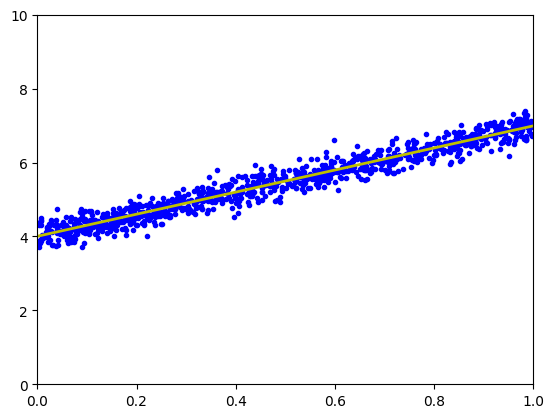

In [30]:
plt.plot(X.T, y.T, 'b.')     # data
plt.plot(x0, y0, 'y', linewidth = 2)   # the fitting line
plt.axis([0, 1, 0, 10])
plt.show()

Đường thẳng tìm được là đường có màu vàng có phương trình $y\approx 4 + 2.998x$

Tiếp theo ta viết đạo hàm và hàm mất mát:

$$
\nabla L(w) = \frac{1}{N}\overline{X}^{T}(\overline{X}w-y)
$$

In [31]:
def grad(
        w
):
    N = Xbar.shape[0]

    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

$$
L(w) = \frac{1}{2N}||y-\overline{X}.w||^{2}_{2}
$$

In [37]:
def cost(
        w
):
    N = Xbar.shape[0]

    return .5/N*np.linalg.norm(y - Xbar.dot(w), 2)**2

### Kiểm tra đạo hàm

Việc tính đạo hàm của hàm nhiều biến thông thường khá phức tạp và rất dễ mắc lỗi, nếu chúng ta tính sai đạo hàm thì thuật toán GD không thể chạy đúng được. Trong thực nghiệm, có một cách để kiểm tra liệu đạo hàm tính được có chính xác không. Cách này dựa trên định nghĩa của đạo hàm (cho hàm 1 biến):
$$
f'(x) = \lim_{\varepsilon\to 0} \frac{f(x + \varepsilon) - f(x)}{\varepsilon}
$$

Một cách thường được sử dụng là lấy một giá trị $\varepsilon$ rất nhỏ, ví dụ $10^{-6}$ và sử dụng công thức:
$$
f^{'}(x) \approx \frac{f(x+\varepsilon)-f(x-\varepsilon)}{2\varepsilon}
$$

$\rightarrow$ đày là **numerical gradient**.

#### Câu hỏi: Tại sao công thức xấp xỉ hai phía trên đây lại được sử dụng rộng rãi, sao không sử dụng công thức xấp xỉ đạo hàm bên phải hoặc bên trái?

##### Giải thích bằng hình học

![](image4.png)

Trong hình, vector màu đỏ là đạo hàm chính xác của hàm số tại điểm có hoành độ bằng $x_{0}$ Vector màu xanh lam (có vẻ là hơi tím sau khi convert từ .pdf sang .png) thể hiện cách xấp xỉ đạo hàm phía phải. Vector màu xanh lục thể hiện cách xấp xỉ đạo hàm phía trái. Vector màu nâu thể hiện cách xấp xỉ đạo hàm hai phía. Trong ba vector xấp xỉ đó, vector xấp xỉ hai phía màu nâu là gần với vector đỏ nhất nếu xét theo hướng.

Sự khác biệt giữa các cách xấp xỉ còn lớn hơn nữa nếu tại điểm x, hàm số bị bẻ cong mạnh hơn. Khi đó, xấp xỉ trái và phải sẽ khác nhau rất nhiều. Xấp xỉ hai bên sẽ ổn định hơn.

##### Giải thích bằng giải tích

Chúng ta cùng quay lại một chút với Giải tích I năm thứ nhất đại học: Khai triển **Taylor**.

Với $\varepsilon$ rất nhỏ, ta có hai xấp xỉ sau:
$$
f(x+\varepsilon) \approx f(x) + f^{'}(x).\varepsilon + \frac{f^{''}(x)}{2}.\varepsilon^{2} + ...
$$

và:
$$
f(x-\varepsilon) \approx f(x) - f^{'}(x).\varepsilon + \frac{f^{''}(x)}{2}.\varepsilon^{2} - ...
$$

Từ đó ta có:
$$
\frac{f(x+\varepsilon)-f(x)}{\varepsilon} \approx f^{'}(x) + \frac{f^{''}(x)}{2}.\varepsilon+...=f{'}(x) + O(\varepsilon) \space (3)
$$

$$
\frac{f(x+\varepsilon)-f(x-\varepsilon)}{2\varepsilon} \approx f^{'}(x) + \frac{f^{(3)}(x)}{6}.\varepsilon^2+...=f{'}(x) + O(\varepsilon^2) \space (4)
$$

Từ đó, nếu xấp xỉ đạo hàm bằng công thức $(3)$ (xấp xỉ đạo hàm phải), sai số sẽ là $O(\varepsilon)$. Trong khi đó, nếu xấp xỉ đạo hàm bằng công thức $(4)$ (xấp xỉ đạo hàm hai phía), sai số sẽ là $O(\varepsilon^2) << O(\varepsilon)$ Cả hai cách giải thích trên đây đều cho chúng ta thấy rằng, xấp xỉ đạo hàm hai phía là xấp xỉ tốt hơn

Cả hai cách giải thích trên đây đều cho chúng ta thấy rằng, xấp xỉ đạo hàm hai phía là xấp xỉ tốt hơn.

##### Giải thích với hàm nhiều biến

Với hàm nhiều biến, công thức $(2)$ được áp dụng cho từng biến khi các biến khác cố định. Cách tính này thường cho giá trị khá chính xác. Tuy nhiên, cách này không được sử dụng để tính đạo hàm vì độ phức tạp quá cao so với cách tính trực tiếp. Khi so sánh đạo hàm này với đạo hàm chính xác tính theo công thức, người ta thường giảm số chiều dữ liệu và giảm số điểm dữ liệu để thuận tiện cho tính toán. Một khi đạo hàm tính được rất gần với numerical gradient, chúng ta có thể tự tin rằng đạo hàm tính được là chính xác.

### Python code:

In [38]:
def numerical_grad(
        w,
        cost
):
    eps = 1e-4
    g = np.zeros_like(w)

    for i in range(len(w)):
        w_p = w.copy()
        w_n = w.copy()

        w_p[i] += eps
        w_n[i] -= eps

        g[i] = (cost(w_p) - cost(w_n)) / (2*eps)

    return g

In [39]:
def check_grad(
        w,
        cost,
        grad
):
    w = np.random.rand(
        w.shape[0],
        w.shape[1]
    )

    grad1 = grad(w)
    grad2 = numerical_grad(w, cost)

    return True if np.linalg.norm(
        grad1 - grad2
    ) < 1e-6 else False

In [40]:
print( 'Checking gradient...', check_grad(np.random.rand(2, 1), cost, grad))

Checking gradient... True


((Với các hàm số khác, bạn đọc chỉ cần viết lại hàm grad và cost ở phần trên rồi áp dụng đoạn code này để kiểm tra đạo hàm. Nếu hàm số là hàm của một ma trận thì chúng ta thay đổi một chút trong hàm numerical_grad, tôi hy vọng không quá phức tạp).)

Với bài toán Linear Regression, cách tính đạo hàm như trong $(1)$ phía trên được coi là đúng vì sai số giữa hai cách tính là rất nhỏ (nhỏ hơn $10^{-6}$).Sau khi có được đạo hàm chính xác, chúng ta viết hàm cho GD:

In [45]:
def myGD2(
        w_init,
        grad,
        eta
):
    w = [w_init]

    for it in range(100):
        w_new = w[-1] - eta*grad(w[-1])

        if np.linalg.norm(grad(w_new)) / len(w_new) < 1e-3:
            break

        w.append(w_new)

    return (w, it)

In [46]:
w_init = np.array([[2],[1]])
w_init

array([[2],
       [1]])

In [47]:
(w1, it1) = myGD2(w_init, grad, 1)
print('Solution found by GD: w = ', w1[-1].T, ',\nafter %d iterations.' %(it1+1))

Solution found by GD: w =  [[4.01889279 2.9600379 ]] ,
after 47 iterations.


Sau 47 vòng lặp, thuật toán đã hội tụ với một nghiệm khá gần với nghiệm tìm được theo công thức.

![](image5.png)

- Trong hình bên trái, các đường thẳng màu đỏ là nghiệm tìm được sau mỗi vòng lặp.
- Trong hình bên phải, tôi xin giới thiệu một thuật ngữ mới: đường đồng mức.

### Đường đồng mức

Với đồ thị của một hàm số với hai biến đầu vào cần được vẽ trong không gian ba chiều, nhều khi chúng ta khó nhìn được nghiệm có khoảng tọa độ bao nhiêu. Trong toán tối ưu, người ta thường dùng một cách vẽ sử dụng khái niệm đường đồng mức (level sets).

Các vòng nhỏ màu đỏ hơn thể hiện các điểm ở trên cao hơn.

Trong toán tối ưu, người ta cũng dùng phương pháp này để thể hiện các bề mặt trong không gian hai chiều

Quay trở lại với hình minh họa thuật toán GD cho bài toán Liner Regression bên trên, hình bên phải là hình biểu diễn các level sets. Tức là tại các điểm trên cùng một vòng, hàm mất mát có giá trị như nhau. Trong ví dụ này, tôi hiển thị giá trị của hàm số tại một số vòng. Các vòng màu xanh có giá trị thấp, các vòng tròn màu đỏ phía ngoài có giá trị cao hơn. Điểm này khác một chút so với đường đồng mức trong tự nhiên là các vòng bên trong thường thể hiện một thung lũng hơn là một đỉnh núi (vì chúng ta đang đi tìm giá trị nhỏ nhất).

Tôi thử với learning rate nhỏ hơn, kết quả như sau:

![](image6.png)

Tốc độ hội tụ đã chậm đi nhiều, thậm chí sau 99 vòng lặp, GD vẫn chưa tới gần được nghiệm tốt nhất. Trong các bài toán thực tế, chúng ta cần nhiều vòng lặp hơn 99 rất nhiều, vì số chiều và số điểm dữ liệu thường là rất lớn.

# 4. Ví dụ khác

Để kết thúc phần 1 của Gradient Descent, tôi xin nêu thêm một ví dụ khác.

![](image7.png)

Hàm số $f(x,y) = (x^2 + y - 7)^2 + (x - y + 1)^2$ có hai điểm local minimum màu xanh lục tại $(2,3)$ và (-3,-2), và chúng cũng là 2 điểm global minimum. Trong ví dụ này, tuỳ vào điểm khởi tạo mà chúng ta thu được các nghiệm cuối cùng khác nhau.